In [1]:
## importing everything for a logistic regression
import seaborn as sns 
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np 
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

In [2]:
## reading in the csv file
df = pd.read_csv('england-premier-league-players-2018-to-2019-stats.csv')

In [3]:
## filtering it to include just Arsenal players
## df = df[df['Current Club'] == 'Arsenal'].reset_index()

In [4]:
df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,1.07,84,84,546,273,0.16,80,13,-1,4
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,1.53,59,63,354,0,0.25,402,293,-1,17
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [5]:
df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,1.07,84,84,546,273,0.16,80,13,-1,4
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,1.53,59,63,354,0,0.25,402,293,-1,17
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [6]:
## creating a new column called sold or not --> 1 indicates that the person was sold, a 0 indicates otherwise
df['Sold or not'] = 0

In [7]:

def players_sold(full_name):
  if full_name in ['Aaron Ramsey', 'Petr Čech', 'Danny Welbeck', 'Laurent Koscielny', 
                   'Alex Iwobi', 'Carl Jenkinson','Nacho Monreal', 'Stephan Lichtsteiner', 'Miguel Ángel Britos Cabrera', 
                   'Marvin Zeegelaar', 'Tommie Hoban', 'Sam Howes', 'Tom Leighton', 'Sulayman Marreh', 
                   'Michael Mullings', 'Obbi Oularé', 'Kai Sanders', 'Dodi Lukebakio', 'Tyler Brown', 'Will Donkin', 'Bivesh Gurung', 'Joseph Hungbo', 'Levi Lumeka', "Oliver O'Dwyer", 
                  'Jason Puncheon', 'Bakary Sako', "Pape N'Diaye Souaré", 'Julián Speroni', 'Aaron Wan-Bissaka', 
                   'Mohamed Diamé', 'Ayoze Perez', 'José Luis Sanmartín Mato', 'Marc Pugh', 'James Boote', 
                   'Nathan Clements', 'Jordan Holmes', 'Tom Parker-Trott', 'Tyrone Mings','Connor Mahoney', 'Lys Mousset', 
                   'Anders Lindegaard', 'Peter Crouch', 'Jonathan Walters', 'Stephen Ward', 'Tom Heaton', 'Steven Davis', 
                   'Jonathan Afolabi', 'Jake Flannigan', 'Ben Rowthorn', 'Jamie Bradley-Green', 'Siph Mdlalose', 'Jordan Araujo', 
                   'Ben Barclay', 'George Bentley', 'Bruno Saltor Grau', 'Julien Carre', 'Will Collar', 
                  'Billy Collings', 'Ben Hall', 'Josh Kerr', 'Stefan Ljubicic', 'Aleš Matějů', 'Owen Moore', 'Joe Tomlinson',
                 'Richie Towell', 'Matthew Weaire', 'Piotr Zalewski', 'Cameron Tutt', 'Markus Suttner', 'Tomer Hemed', 
                   'Jordan Duffey', 'Tyrone Duffus', 'Aron Einar Gunnarsson', 'Kadeem Harris', 'Jack McKay', 'Brian Murphy', 
               "Stuart O'Keefe", 'Adam Sharif', 'Henry Smith', 'Rhys Healey', 'Bruno Écuélé Manga', 'Kenneth Dahrup Zohorè', 
               'Loïc Damour', 'Showkat Ali Tahir', 'Elijah Adebayo', 'Scott Armsworth', 'Robert Atkinson', 'Ryan Guno Babel', 
                   'Aron Davies', 'José Garrido', 'Mattias Käit', 'Chris Kelly', 'Lazar Marković', 'Berti Schötterl', 
                   'Jón Dagur Þorsteinsson', 'Erick Kenko', 'Harvey Elliot', 'Ryan Sessegnon', 'Rui Fonte', 'Marcelo Djaló',
                  'Chris Löwe', 'Laurent Depoitre', 'Erik Durm', 'Jonas Lössl', 'Jack Payne', 'Daniel Williams', 'Tom Smith',
               'Philip Billing', 'Mathias Jattah-Njie Jørgensen', 'Abdelhamid Sabiri', 'Rajiv van La Parra']:
    return 1
  else:
    return 0

In [8]:
df['Sold or not'] = df['full_name'].apply(players_sold)

In [9]:
df['Sold or not'].value_counts()

0    524
1     48
Name: Sold or not, dtype: int64

In [10]:
df[df['Current Club'] == 'Cardiff City']

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not
26,Alex Smithies,31,636595200,1990/03/05,Premier League,2018/2019,Goalkeeper,Cardiff City,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0
60,Aron Einar Gunnarsson,31,609206400,1989/04/22,Premier League,2018/2019,Midfielder,Cardiff City,2274,1240,...,61,81,455,2274,0.20,232,234,-1,9,1
86,Bobby Reid,28,728611200,1993/02/02,Premier League,2018/2019,Midfielder,Cardiff City,1422,725,...,53,53,0,711,0.00,55,115,-1,2,0
87,Brian Murphy,37,421113600,1983/05/07,Premier League,2018/2019,Goalkeeper,Cardiff City,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,1
89,Bruno Écuélé Manga,32,585014400,1988/07/16,Premier League,2018/2019,Defender,Cardiff City,3375,1710,...,57,89,0,3375,0.00,337,242,126,24,1
93,Callum Paterson,26,782006400,1994/10/13,Premier League,2018/2019,Defender,Cardiff City,1996,1024,...,54,74,499,1996,0.18,108,202,137,3,0
141,Danny Ward,30,660700800,1990/12/09,Premier League,2018/2019,Forward,Cardiff City,440,246,...,40,31,0,0,0.00,94,382,-1,10,0
147,David Junior Hoilett,30,644544000,1990/06/05,Premier League,2018/2019,Forward,Cardiff City,2142,1008,...,51,67,536,2142,0.17,137,220,-1,7,0
203,Gary Madine,30,651456000,1990/08/24,Premier League,2018/2019,Forward,Cardiff City,32,17,...,16,6,0,0,0.00,-1,-1,-1,20,0
212,Greg Cunningham,30,665280000,1991/01/31,Premier League,2018/2019,Defender,Cardiff City,630,450,...,39,90,210,0,0.43,313,381,170,19,0


In [11]:
Watford_squad = ['Miguel Ángel Britos Cabrera', 'Marvin Zeegelaar', 'Tommie Hoban', 'Sam Howes', 'Tom Leighton', 
'Sulayman Marreh', 'Michael Mullings', 'Obbi Oularé', 'Kai Sanders', 'Dodi Lukebakio']

In [12]:
Crystal_palace = ['Tyler Brown', 'Will Donkin', 'Bivesh Gurung', 'Joseph Hungbo', 'Levi Lumeka', "Oliver O'Dwyer", 
                  'Jason Puncheon', 'Bakary Sako', "Pape N'Diaye Souaré", 'Julián Speroni', 'Aaron Wan-Bissaka']

In [13]:
Newcastle_squad = ['Mohamed Diamé', 'Ayoze Perez', 'José Luis Sanmartín Mato']

In [14]:
Bournemouth_squad = ['Marc Pugh', 'James Boote', 'Nathan Clements', 'Jordan Holmes', 'Tom Parker-Trott', 'Tyrone Mings',
                  'Connor Mahoney', 'Lys Mousset']

In [15]:
Burnley_squad = ['Anders Lindegaard', 'Peter Crouch', 'Jonathan Walters', 'Stephen Ward', 
                 'Tom Heaton']

## Peter Crouch is retired
## I believe Petr Cech did the same
## Bruno from Brighton is retired

In [16]:
Southampton_squad = ['Steven Davis', 'Jonathan Afolabi', 'Jake Flannigan', 'Ben Rowthorn', 'Jamie Bradley-Green', 
                     'Siph Mdlalose']

## Winter transfers
## 'Cedric Soares', 'Marcus Barnes', 'Alex Cull', 'Harlem Hale','Šimon Kozák', 'Christian Norton', 'Maya Yoshida', "Aaron O'Driscoll", 'Jack Rose'

In [17]:
brighton_squad = ['Jordan Araujo', 'Ben Barclay', 'George Bentley', 'Bruno Saltor Grau', 'Julien Carre', 'Will Collar', 
                  'Billy Collings', 'Ben Hall', 'Josh Kerr', 'Stefan Ljubicic', 'Aleš Matějů', 'Owen Moore', 'Joe Tomlinson',
                 'Richie Towell', 'Matthew Weaire', 'Piotr Zalewski', 'Cameron Tutt', 'Markus Suttner', 'Tomer Hemed']

In [18]:
cardiff_city = ['Jordan Duffey', 'Tyrone Duffus', 'Aron Einar Gunnarsson', 'Kadeem Harris', 'Jack McKay', 'Brian Murphy', 
               "Stuart O'Keefe", 'Adam Sharif', 'Henry Smith', 'Rhys Healey', 'Bruno Écuélé Manga', 'Kenneth Dahrup Zohorè', 
               'Loïc Damour']

In [19]:
Fulham_squad = ['Showkat Ali Tahir', 'Elijah Adebayo', 'Scott Armsworth', 'Robert Atkinson', 'Ryan Guno Babel', 'Aron Davies', 
               'José Garrido', 'Mattias Käit', 'Chris Kelly', 'Lazar Marković', 'Berti Schötterl', 'Jón Dagur Þorsteinsson'
               'Erick Kenko', 'Harvey Elliot', 'Ryan Sessegnon', 'Rui Fonte', 'Marcelo Djaló']

In [20]:
Huddersfield = ['Chris Löwe', 'Laurent Depoitre', 'Erik Durm', 'Jonas Lössl', 'Jack Payne', 'Daniel Williams', 'Tom Smith',
               'Philip Billing', 'Mathias Jattah-Njie Jørgensen', 'Abdelhamid Sabiri', 'Rajiv van La Parra']

In [21]:
df[df['Current Club'] == 'Huddersfield Town']

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,51,80,582,2327,0.15,144,233,-1,3,0
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,69,35,0,0,0.00,-1,-1,-1,31,0
6,Abdelhamid Sabiri,24,849139200,1996/11/28,Premier League,2018/2019,Midfielder,Huddersfield Town,49,0,...,16,25,0,0,0.00,-1,-1,-1,22,1
13,Adama Diakhaby,24,836524800,1996/07/05,Premier League,2018/2019,Forward,Huddersfield Town,551,345,...,34,46,551,0,0.16,332,359,-1,26,0
25,Alex Pritchard,27,736387200,1993/05/03,Premier League,2018/2019,Midfielder,Huddersfield Town,2092,992,...,54,70,1046,0,0.09,171,373,-1,5,0
75,Ben Hamer,33,564364800,1987/11/20,Premier League,2018/2019,Goalkeeper,Huddersfield Town,553,283,...,28,79,0,0,0.00,327,348,175,14,0
109,Chris Löwe,31,608688000,1989/04/16,Premier League,2018/2019,Defender,Huddersfield Town,2056,932,...,40,71,1028,1028,0.09,328,163,169,30,1
118,Christopher Schindler,30,641347200,1990/04/29,Premier League,2018/2019,Defender,Huddersfield Town,3262,1642,...,47,88,544,0,0.17,252,345,157,9,0
121,Collin Quaner,29,677203200,1991/06/18,Premier League,2018/2019,Forward,Huddersfield Town,37,9,...,19,19,0,0,0.00,-1,-1,-1,15,0
135,Daniel Williams,32,605318400,1989/03/08,Premier League,2018/2019,Midfielder,Huddersfield Town,93,13,...,93,19,93,0,0.97,-1,-1,-1,21,1


In [22]:
df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,72,79,1589,1589,0.06,290,191,80,20,0
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,61,76,1217,1217,0.07,196,187,-1,10,0
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,51,80,582,2327,0.15,144,233,-1,3,0
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,111,47,0,221,0.00,69,8,-1,5,1
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,69,35,0,0,0.00,-1,-1,-1,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,84,84,546,273,0.16,80,13,-1,4,0
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,59,63,354,0,0.25,402,293,-1,17,0
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0


In [23]:
df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,72,79,1589,1589,0.06,290,191,80,20,0
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,61,76,1217,1217,0.07,196,187,-1,10,0
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,51,80,582,2327,0.15,144,233,-1,3,0
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,111,47,0,221,0.00,69,8,-1,5,1
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,69,35,0,0,0.00,-1,-1,-1,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,84,84,546,273,0.16,80,13,-1,4,0
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,59,63,354,0,0.25,402,293,-1,17,0
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0


In [24]:
df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,72,79,1589,1589,0.06,290,191,80,20,0
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,61,76,1217,1217,0.07,196,187,-1,10,0
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,51,80,582,2327,0.15,144,233,-1,3,0
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,111,47,0,221,0.00,69,8,-1,5,1
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,69,35,0,0,0.00,-1,-1,-1,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,84,84,546,273,0.16,80,13,-1,4,0
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,59,63,354,0,0.25,402,293,-1,17,0
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0,0,0,0,0.00,-1,-1,-1,-1,0


In [25]:
## sold players: petr cech, lichtsteiner, aaron ramsey, danny welbeck, koscielny, iwobi, jenkinson, monreal
## loaned players: nketiah, elneny, mkhitaryan, emile smith rowe, mavropanos

In [26]:
Y = df['Sold or not']

In [27]:
df.columns

Index(['full_name', 'age', 'birthday', 'birthday_GMT', 'league', 'season',
       'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'nationality',
       'appearances_overall', 'appearances_home', 'appearances_away',
       'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
       'conceded_overall', 'conceded_home', 'conceded_away',
       'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfie

In [28]:
feature_cols = ['age',
                'minutes_played_overall',
                #'appearances_overall',
                'goals_overall',
                'assists_overall',
                #'clean_sheets_overall',
                'conceded_overall',
                #'red_cards_overall',
                'rank_in_league_top_attackers',
                #'rank_in_league_top_midfielders',
                # 'rank_in_league_top_defenders',
                'rank_in_club_top_scorer'
                ]


X = df[feature_cols]

## As with linear regression, we need to manually add the constant - this is the alpha term! 
X = sm.add_constant(X)

In [29]:
lr = sm.Logit(Y, X).fit() ## Create and fit the model

lr.summary()

lr.k_constant

Optimization terminated successfully.
         Current function value: 0.249983
         Iterations 8


1

In [30]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Sold or not   No. Observations:                  572
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Oct 2021   Pseudo R-squ.:                  0.1327
Time:                        11:02:05   Log-Likelihood:                -142.99
converged:                       True   LL-Null:                       -164.87
Covariance Type:            nonrobust   LLR p-value:                 2.383e-07
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.4260      1.095     -5.868      0.000      -8.573      -4.280
age                              0.1384      0.035      3.960      0.000       0.070       0.207
minutes_played_overall          -0.0016      0.001     -2.811      0.005      -0.003      -0.000
goals_overall                   -0.0936      0.109     -0.858      0.391      -0.307       0.120
assists_overall                  0.1101      0.115      0.961      0.337      -0.115       0.335
conceded_overall                 0.0902      0.028      3.253      0.001       0.036       0.145
rank_in_league_top_attackers    -0.0034      0.002     -1.989      0.047      -0.007   -5.05e-05
rank_in_club_top_scorer          0.0517      0.022      2.299      0.022       0.008       0.096
================================================================================================
"""

In [31]:
df['prediction'] = lr.predict(X)

In [32]:
df.head(10)

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not,prediction
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,79,1589,1589,0.06,290,191,80,20,0,0.078485
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,76,1217,1217,0.07,196,187,-1,10,0,0.111180
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,80,582,2327,0.15,144,233,-1,3,0,0.096093
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,47,0,221,0.00,69,8,-1,5,1,0.050157
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,35,0,0,0.00,-1,-1,-1,31,0,0.112223
5,Aaron Wan-Bissaka,23,880502400,1997/11/26,Premier League,2018/2019,Midfielder,Crystal Palace,3135,1605,...,90,523,1045,0.17,312,160,-1,22,1,0.017872
6,Abdelhamid Sabiri,24,849139200,1996/11/28,Premier League,2018/2019,Midfielder,Huddersfield Town,49,0,...,25,0,0,0.00,-1,-1,-1,22,1,0.145734
7,Abdoulaye Doucouré,28,725846400,1993/01/01,Premier League,2018/2019,Midfielder,Watford,3062,1566,...,87,437,510,0.21,124,80,-1,5,0,0.083038
8,Aboubakar Kamara,26,794534400,1995/03/07,Premier League,2018/2019,Forward,Fulham,687,468,...,53,344,0,0.26,38,412,-1,4,0,0.065784
9,Adalberto Peñaranda Maestre,23,865036800,1997/05/31,Premier League,2018/2019,Forward,Watford,0,0,...,0,0,0,0.00,-1,-1,-1,-1,0,0.035886


In [33]:
from sklearn.metrics import (confusion_matrix, accuracy_score) 
def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
## positive label --> y = 1 class
## negative label --> y = 0 class

    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

Test accuracy =  0.8321678321678322


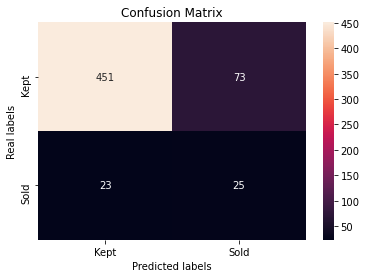

In [38]:
produce_confusion('Sold', 'Kept', 0.14 , df, 'prediction', 'Sold or not')

In [35]:
cut_off = 0.05
df['pred_binary'] = np.where(df['prediction'] > cut_off , 1, 0)

In [36]:
df

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not,prediction,pred_binary
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1589,1589,0.06,290,191,80,20,0,0.078485,1
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1217,1217,0.07,196,187,-1,10,0,0.111180,1
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,582,2327,0.15,144,233,-1,3,0,0.096093,1
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0,221,0.00,69,8,-1,5,1,0.050157,1
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,0,0,0.00,-1,-1,-1,31,0,0.112223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,546,273,0.16,80,13,-1,4,0,0.024818,0
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,354,0,0.25,402,293,-1,17,0,0.025641,0
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0,0,0.00,-1,-1,-1,-1,0,0.023984,0
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0,0,0.00,-1,-1,-1,-1,0,0.023984,0
